# DAML 06 - Monte Carlo

Michal Grochmal <michal.grochmal@city.ac.uk>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

The idea of the Monte Carlo technique consists of measuring random points in a search space
and then take out conclusions from the measured points.  The bigger number of random points
the more likely we are to an exact solution.  In other words, the method *converges* on a solution.

As an example we can estimate the value of $\pi$ using the distance between the origin
and the radius of a circle centered on the origin.  This comes straight from Pythagoras:

$$h^2 = a^2 + b^2 \Leftrightarrow d = \sqrt{x^2 + y^2}$$

If a point is inside the circle, then the distance will smaller then the radius, otherwise
it will be bigger.  We will use a circle or radius 1, since that is the basic trigonometric circle.
The argument to our estimator is the number of points used.

3.2360000000000002

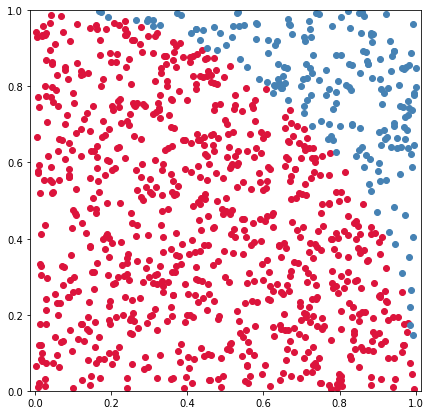

In [2]:
def approx_pi(n=1000, plot=False):
    points = np.random.rand(n, 2)
    result = np.sqrt(points[:, 0]**2 + points[:, 1]**2) < 1.0
    pi = 4 * (result.sum() /  n)
    if plot:
        fig, ax = plt.subplots(figsize=(7, 7))
        ax.plot(points[result, 0], points[result, 1], 'o', color='crimson')
        ax.plot(points[~result, 0], points[~result, 1], 'o', color='steelblue')
        ax.axis('equal')
        ax.axis([0, 1, 0, 1])
    return pi


approx_pi(plot=True)

3.1421079999999999

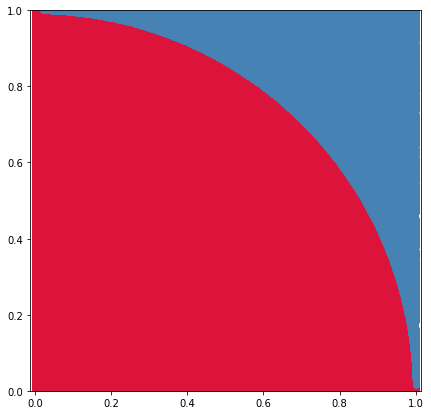

In [3]:
approx_pi(10**6, plot=True)

In [4]:
for i in range(7):
    print(10**i, approx_pi(10**i))

1 0.0
10 3.6
100 3.36
1000 3.192
10000 3.0844
100000 3.13712
1000000 3.140964


In [5]:
def approx_times(func, times=10, *args, **kwargs):
    results = []
    for i in range(times):
        results.append(func(*args, **kwargs))
    return np.mean(results)


approx_times(approx_pi, times=3, n=1000)

3.1266666666666669

In [6]:
for i in range(1, 26):
    for j in range(7):
        if i % 5 == 0 and j % 3 == 0:
            print(i, 10**j, approx_times(approx_pi, times=i, n=10**j))
np.pi

5 1 4.0
5 1000 3.1328
5 1000000 3.1405928
10 1 3.6
10 1000 3.0908
10 1000000 3.142126
15 1 3.2
15 1000 3.148
15 1000000 3.1422912
20 1 3.0
20 1000 3.1482
20 1000000 3.141288
25 1 3.36
25 1000 3.14528
25 1000000 3.1417424


3.141592653589793